# Guide

## Basics

In [1]:
using Turing
using StatsPlots
using Random

### Simple Guassian Demo

In [2]:
@model function gdemo(x,y)
    s² ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s²))
    x ~ Normal(m, sqrt(s²))
    y ~ Normal(m, sqrt(s²))
  end
  
# Run sampler, collect results
chn = sample(gdemo(1.5, 2), HMC(0.1, 5), 1000)

# Summarise results
describe(chn)

# Plot and save results
plot(chn)

LoadError: UndefVarError: s not defined

#### Sampling 

In [7]:
 Run sampler, collect results.
c1 = sample(gdemo(1.5, 2), SMC(), 1000)
c2 = sample(gdemo(1.5, 2), PG(10), 1000)
c3 = sample(gdemo(), HMC(0.1, 5), 1000)
c4 = sample(gdemo(1.5, 2), Gibbs(PG(10, :m), HMC(0.1, 5, :s²)), 1000)
c5 = sample(gdemo(1.5, 2), HMCDA(0.15, 0.65), 1000)
c6 = sample(gdemo(1.5, 2), NUTS(0.65), 1000)

Chains MCMC chain (1000×10×1 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 4.49 seconds
Compute duration  = 4.49 seconds
parameters        = m
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat   es ⋯
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64      ⋯

           m   -0.1782    0.9888     0.0313    0.1067   54.5817    1.0134      ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           m   -2.1856   -0.8135   -0.1187    0.4286    1.7153


#### Plot ans save figure

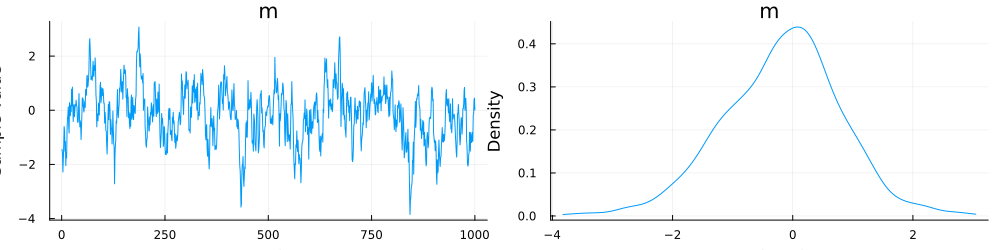

In [8]:
plot(c3)
# Save fig
# savefig('Test.png')

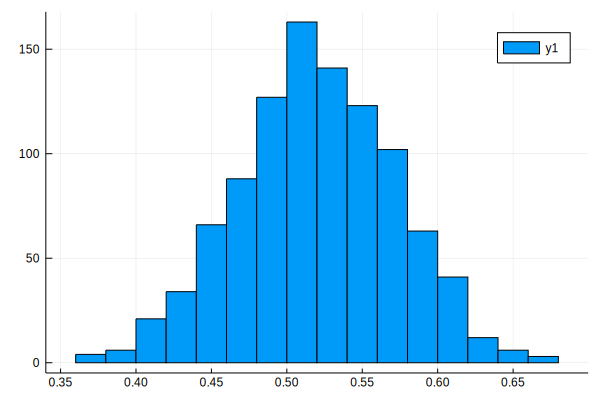

In [3]:
# Set the true probability of heads in a coin.
p_true = 0.5

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100

# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns))

# Declare our Turing model.
@model function coinflip(y)
    # Our prior belief about the probability of heads in a coin.
    p ~ Beta(1, 1)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Bernoulli(p)
    end
end

# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(data), HMC(ϵ, τ), iterations)

# Plot a summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
histogram(chain[:p])

### Modeling Syntax Explained 

Defining a model, you can get a sample from a distribution or a sample from posterior using "sample" methods, see the following two cells and compare the output. For sample from a posterior, you need to define variable x before line x ~ dist. sample method get samples from other random variables conditioned on x. In case of undefined variable x before line x ~ dist, however, sample method is going to return samples from random variable x with density dist.

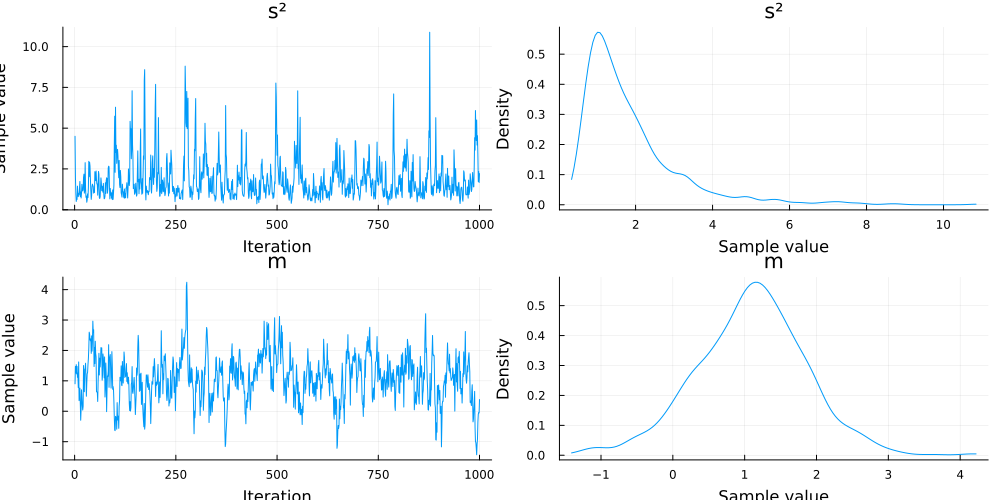

In [3]:
@model function gdemo1(x,y)
    s² ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s²))
    x ~ Normal(m, sqrt(s²))
    y ~ Normal(m, sqrt(s²))
  end
# Run sampler, collect results
chn = sample(gdemo1(1.5, 2), HMC(0.1, 5), 1000)

# Summarise results
describe(chn)

# Plot and save results
plot(chn)  

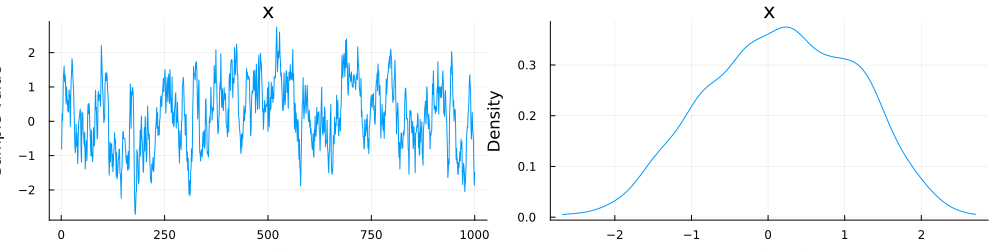

In [4]:
@model function gdemo2()
    s = 1
    x ~ Normal(0, s)
  end
chn = sample(gdemo2(), HMC(0.1, 5), 1000)

# Summarise results
describe(chn)

# Plot and save results
plot(chn)    

In [10]:
# Define a simple Normal model with unknown mean and variance.
@model function model_function(y)
    s ~ Poisson(1)
    y ~ Normal(s, 1)
    return y
end

sample(model_function(10), SMC(), 100)



Chains MCMC chain (100×3×1 Array{Float64, 3}):

Log evidence      = -22.42198874248497
Iterations        = 1:1:100
Number of chains  = 1
Samples per chain = 100
Wall duration     = 4.41 seconds
Compute duration  = 4.41 seconds
parameters        = s
internals         = lp, weight

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

           s    3.9900    0.1000     0.0100    0.0100   100.0817    1.0000     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           s    4.0000    4.0000    4.0000    4.0000    4.0000


In [ ]:
# Define a simple Normal model with unknown mean and variance.
@model function model_function(y)
    y ~ Normal(s, 1)
    s ~ Poisson(1)
    return y
end

sample(model_function(10), SMC(), 100)
# it is going to have error after run, due to the wrong order of lines used in model 

### Sampling Multiple Chains